# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [192]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
import json
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [193]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [194]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

image = pd.read_csv('image_predictions.tsv', sep = '\t')

In [195]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. loading the json file gotten through the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### Personal Twitter API keys, Secrets, and Tokens


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

In [196]:
#Impaorting our twitter api file already downloaded and stored on our system
twitter_list = []
# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [197]:
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [198]:
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data

Each piece of gathered data is displayed in the Jupyter Notebook for both visual and programmatic assessment purposes.
Some visual assesment was done using Google sheets

In [199]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [200]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [201]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [202]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [203]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [204]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [205]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [206]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [207]:
image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [208]:
twitter_data.dtypes

tweet_id           object
retweet_count       int64
favorite_count      int64
followers_count     int64
dtype: object

In [209]:
archive.tweet_id.duplicated().sum()

0

In [210]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [211]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [212]:
archive['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [213]:
archive.text.str.extract('([0-9]*/[0-9]*)')

,0
0,13/10
1,13/10
2,12/10
3,13/10
4,12/10
...,...
2351,5/10
2352,6/10
2353,9/10
2354,7/10


In [214]:
archive[archive.rating_numerator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


### Quality issues

1. The source column has some html tags tied to it. 

2. Text column contains more than one observation which are text,ratings and a shortlink

3. Some records were just retweets which need to delete becuase they are just duplicated data

4. A lot erroneous data types in many columns in the archive data(tweet_id and timestamp)

5. Some Dog names are not real names

6. Erroneous datatypes of tweets_id in both images

7. Most numerator ratings were wringly gathered 

8. Rating denominator should be equal to 10



### Tidiness issues
1. Removing columns unneeded for our analysis from the image table

2. Removing columns unneeded for our analysis from the twitter api

3. The image and api_tweets table should be added to the archive table

4. The dogs stages should be combined into 1



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [215]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image.copy()
twitter_clean = twitter_data.copy()

### Archive Cleaning

### Issue #1:

#### Define:  
Extracting the html tag from the source and geting to the source.
using pandas.Series.str.extract and regular expressions

#### Code

In [216]:
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [217]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #2:

#### Define 
Removing the html links
https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### Code

In [218]:
#define function and apply to archive_clean table
def htmlink(a):
        http_pos = a.find("http")
        # If no link, retain row
        if http_pos == -1:
            a = a
        else:
            # Remove space before link to end
            a = a[:http_pos - 1]
        return a
    
archive_clean.text = archive_clean.text.apply(htmlink)

#### Test

In [219]:
#confirm changes to show no hyperlink in column again
archive_clean.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

### ISSUE #3 :

#### DEFINE
some tweets are retweets or replies
. Remove all records in the archive_clean dataset that have values in the rows in_reply_to_status_id or retweeted_status_id. Then remove those two columns plus retweeted_status_user_id, retweeted_status_timestamp and in_reply_to_user_id

In [220]:
archive_clean = archive_clean[(archive_clean['in_reply_to_status_id'].isna() == True)  &
                              (archive_clean['retweeted_status_id'].isna() == True)]

archive_clean = archive_clean.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

#### Test

In [221]:
# making sure the columns were deleted 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #4

#### Define 
 archive's tweet_id and timestamp column has a erronouse datatype which can be  using 'astype' 

#### Code

In [222]:
# convert the tweet_id datatype to String
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

# converting timestamp datatype to Datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### check

In [223]:
#Checking
archive_clean[['tweet_id', 'timestamp']].dtypes

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object

### Issue #5 

#### Define

In [224]:
archive_clean.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

In [225]:
# to look at the liat of unique names of the dog
archive_clean.name.unique()
#a,an, such,quite,all,his,my,very,not

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

#### Code

In [226]:
# querying out all records with the identified wroing names
wrong_names = [ 'a','an','such','quite','my','all','his','my','very']
#Replacing the wrong names to none
for name in wrong_names:
    archive_clean.name.replace(name, "None", inplace = True)

#### Test

In [227]:
# Checking 
for name in wrong_names:
    assert name not in archive_clean.name.values

### Issue #6

#### Define
tweet_id column is supposed to be a str instead of an int

#### code

In [228]:
image_clean.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [229]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

#### Test

In [230]:
image_clean.tweet_id.dtypes

dtype('O')

### Issue #7

#### Define 
Replacing the numerators rating with the accurates one from the text from the text.

#### Code

In [231]:
# extrating the rating from the text column
archive_clean['ratings'] = archive_clean.text.str.extract('([0-9]*/[0-9]*)')

In [232]:
#slicing to get the right numerator rating
archive_clean.rating_numerator = archive_clean.ratings.str[:2].str.replace("/","") 

#### Test

In [233]:
archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     39
5      34
6      32
3      18
4      16
2       9
1       5
        2
75      1
88      1
26      1
44      1
60      1
45      1
80      1
27      1
99      1
50      1
20      1
17      1
16      1
0       1
84      1
24      1
42      1
Name: rating_numerator, dtype: int64

#### Issue #8

#### Code

In [234]:
archive_clean.ratings

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: ratings, Length: 2097, dtype: object

In [235]:
archive_clean.rating_denominator.value_counts

<bound method IndexOpsMixin.value_counts of 0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2097, dtype: int64>

In [236]:
archive_clean.rating_denominator = archive_clean.ratings.str[-2:].str.replace("/","")
archive_clean.loc[archive_clean['rating_denominator'] != 10, 'rating_denominator'] = 10

#### Test

In [237]:
#checking to see if all rating_denominators were changed to 10
archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

In [238]:
#dropping the ratings column I extracted
archive_clean.drop(columns = ['ratings'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


### Tidiness

#### Issue 1

#### Define
Some columns in the image table are not needed for our analysis

In [239]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Code

In [240]:
image_clean.drop(['p1_conf', 'p2_conf','p3_conf'], axis = 1, inplace = True)

#### Test

In [241]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3',
       'p3_dog'],
      dtype='object')

#### Issue 2

#### Define
Deleting columns from our API data not needed for the our analysis

#### Code

In [242]:
twitter_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'], dtype='object')

In [243]:
twitter_clean = twitter_clean[['tweet_id', 'retweet_count', 'favorite_count']]

#### Test

In [244]:
twitter_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue 3

#### Define
merging all the data into one table

#### Code

In [245]:
#merging all the tables
archive1_clean = pd.merge(left=archive_clean, right=twitter_clean, how='left', on='tweet_id')
master_clean = pd.merge(left=archive1_clean, right=image_clean, how='left', on='tweet_id')

#### Check

In [246]:
# checking the master dataframe
master_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,retweet_count,favorite_count,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog
980,717009362452090881,2016-04-04 15:22:08+00:00,Twitter for iPhone,This is Smokey. He's having some sort of exist...,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,...,1102,3583,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1.0,Siberian_husky,True,Eskimo_dog,True,malamute,True
124,863553081350529029,2017-05-14 00:34:33+00:00,Twitter for iPhone,This is Neptune. He's a backpup vocalist for t...,https://twitter.com/dog_rates/status/863553081...,13,10,Neptune,None,None,...,4489,15935,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1.0,Eskimo_dog,True,malamute,True,Siberian_husky,True
826,744223424764059648,2016-06-18 17:41:06+00:00,Twitter for iPhone,This is actually a pupper and I'd pet it so we...,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,...,424,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,867051520902168576,2017-05-23 16:16:06+00:00,Twitter for iPhone,"Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,...,8425,33420,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1.0,Samoyed,True,Pekinese,True,Pomeranian,True
764,750071704093859840,2016-07-04 21:00:04+00:00,Twitter for iPhone,Pause your cookout and admire this pupper's ni...,https://twitter.com/dog_rates/status/750071704...,10,10,None,None,None,...,3802,8653,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2.0,redbone,True,malinois,True,miniature_pinscher,True


#### Issue 4

#### Define
Dog_stages should me in one column

#### Code

In [247]:
#Checking the available columns
master_clean.dtypes
print(master_clean.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'ratings', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'],
      dtype='object')


In [248]:
master_clean['dogs_stage']= master_clean['doggo'] + master_clean['floofer'] + master_clean['pupper'] + master_clean['pupper']

master_clean['dogs_stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNonepupperpupper',
       'NoneflooferNoneNone', 'doggoflooferNoneNone',
       'doggoNonepupperpupper'], dtype=object)

In [249]:
# to replace the "None" with "" to minimize start shaping the names 
master_clean['dogs_stage'] = master_clean.dogs_stage.map(lambda x: x.replace("None", ""))

master_clean['dogs_stage'].unique()

array(['', 'doggo', 'pupperpupper', 'floofer', 'doggofloofer',
       'doggopupperpupper'], dtype=object)

From my study of the dataset I made the following conclusions 
- The none statements meant the dog stage was "undecided" yet meaning the dog was either in transistion 
- PupperPupper is equal to pupper
- doggopupperpupper is equla to pupper
- doggofloofer is equal to floofer

In [250]:
master_clean['dogs_stage'] = master_clean['dogs_stage'].replace('','Undecided')
master_clean['dogs_stage'] = master_clean['dogs_stage'].replace('pupperpupper','pupper')
master_clean['dogs_stage'] = master_clean['dogs_stage'].replace('doggopupperpupper','pupper')
master_clean['dogs_stage'] = master_clean['dogs_stage'].replace('doggofloofer','floofer')

#### TEST

In [251]:
master_clean['dogs_stage'].value_counts()

Undecided    1784
pupper        230
doggo          73
floofer        10
Name: dogs_stage, dtype: int64

dropping the already merged dog stage columns

In [252]:
master_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis=1 ,inplace = True)

In [253]:
master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'ratings',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_dog',
       'p2', 'p2_dog', 'p3', 'p3_dog', 'dogs_stage'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [254]:
# saving the master_clean table to a file 
master_clean.to_csv('twitter_archive_master.csv', index = False)

In [255]:
# to check if the file was saved/ it exist locally
os.path.exists('twitter_archive_master.csv')

True

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### QUESTIONS
- Q1:Most used Twitter Source
- Q2:The most common dog name used 
- Q3:The retweet pattern overtime? 

In [256]:
master_clean.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,ratings,retweet_count,favorite_count,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,dogs_stage
984,716447146686459905,2016-04-03 02:08:05+00:00,Vine - Make a Scene,This is Ozzy. He's acrobatic af. Legendary pup...,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,13/10,6643,14327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pupper
1698,673689733134946305,2015-12-07 02:25:23+00:00,Twitter for iPhone,When you're having a blast and remember tomorr...,https://twitter.com/dog_rates/status/673689733...,11,10,None,11/10,700,1855,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1.0,Chesapeake_Bay_retriever,True,American_Staffordshire_terrier,True,seat_belt,False,Undecided
570,780459368902959104,2016-09-26 17:29:48+00:00,Twitter for iPhone,"This is Bear. Don't worry, he's not a real bea...",https://twitter.com/dog_rates/status/780459368...,11,10,Bear,11/10,1224,5892,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1.0,Great_Dane,True,German_shepherd,True,bull_mastiff,True,Undecided
1594,676121918416756736,2015-12-13 19:30:01+00:00,Vine - Make a Scene,Here we are witnessing a very excited dog. Cle...,https://vine.co/v/iZXg7VpeDAv,8,10,None,8/10,1297,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undecided


In [257]:
#retriving the source of the post and their frequencies 
source_data = master_clean['source'].value_counts()
source_data

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

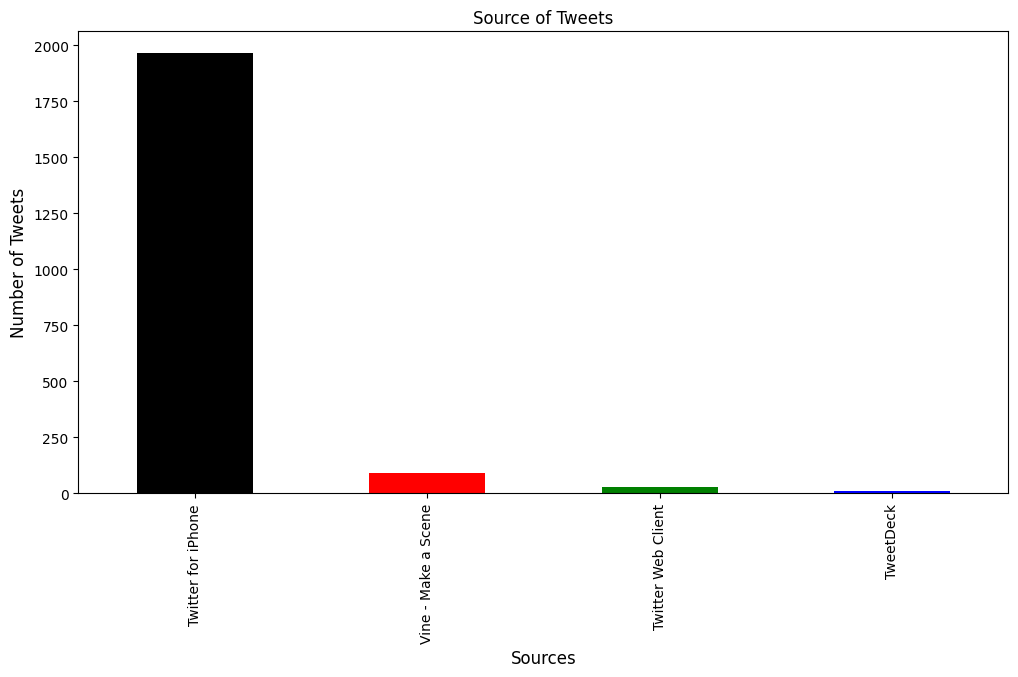

In [258]:
# to plot a bar graph to show the distribution 
plt.figure(figsize = (12, 6))
source_data.plot.bar(color =['black', 'red', 'green', 'blue'])
plt.title('Source of Tweets')
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Sources', fontsize = 12)
plt.show()

### Q2:The most common dog name used

In [259]:
top5_names = master_clean.name.value_counts().head(6)

# removign the unnamed dogs
top5_names = top5_names[1:]
top5_names

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Name: name, dtype: int64

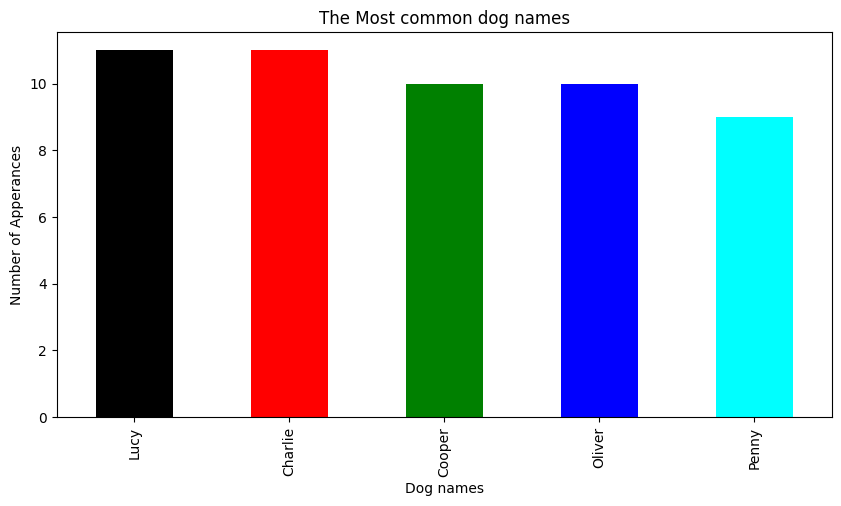

In [260]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
top5_names.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
 
plt.xlabel("Dog names")
plt.ylabel("Number of Apperances")
plt.title("The Most common dog names")
plt.show()

#### Q3. The retweet pattern overtime?

In [261]:
master_clean.loc[master_clean['retweet_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
ratings                                                           13/10
retweet_count                                                     79515
favorite_count                                                   131075
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                             1.0
p1                                                   Labrador_re

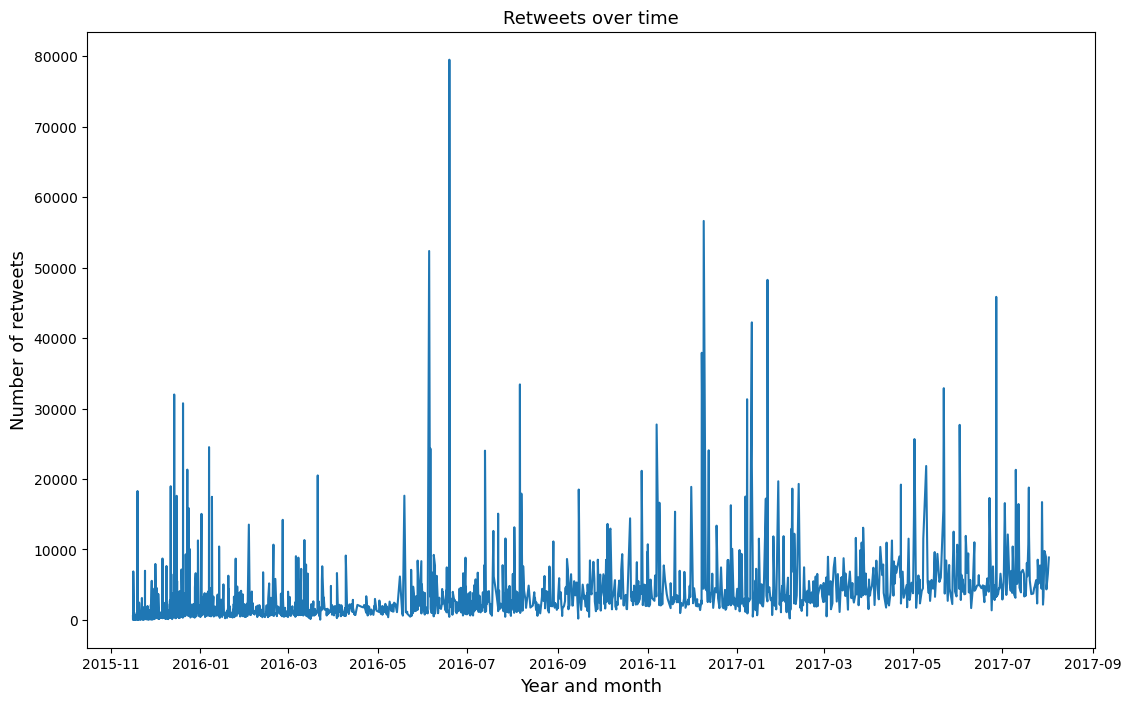

In [262]:
#ploting the retweet patterns over time 
sns.set_context()
plt.subplots(figsize=(13, 8))
plt.plot(master_clean.timestamp, master_clean.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');

### Conclusion:
From our analysis we could came out with the following conclusions from the questions asked
1. WeRateDogs admins did most of their postings using An Iphone which was had the most frequency in our dataset

2. Looking at our WeRateDogs dataset we can say that the most popular name in this era was Lucy with 11 appearance

3. Our visualisation didn't show a stable pattern but we could get the record with the highest retweet count for further study

### Limitation
-  Most of the records did not have names
-  We couldn't get most of the dog stages of most records